In [128]:
#IMPORTS

import pandas as pd
import math
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run ../datuslib.ipynb

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [153]:
M_df = pd.read_csv("../Data/train.csv")
M_df.shape

(7613, 5)

In [154]:
M_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [155]:
M_df.dropna(subset=['location'], inplace=True)
M_df.shape

(5080, 5)

In [156]:
M_df['full_locations'] = M_df.location.map(getLocation)
M_df.head()

,id,keyword,location,text,target,full_locations
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,"(Europe, United Kingdom, Birmingham)"
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,"(Europe, United Kingdom, Bristol)"
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,"(Africa, __UNKNOWN, __UNKNOWN)"
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,"(North America, United States, Philadelphia)"
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,"(North America, Canada, London)"


In [157]:
M_df['continents'] = M_df['full_locations'].map(lambda x: x[0] if x[0]!='EuropeEurope' else 'Europe')
M_df['countries'] = M_df['full_locations'].map(lambda x: x[1])
M_df['cities'] = M_df['full_locations'].map(lambda x: x[2])
M_df.head()

,id,keyword,location,text,target,full_locations,continents,countries,cities
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,"(Europe, United Kingdom, Birmingham)",Europe,United Kingdom,Birmingham
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,"(Europe, United Kingdom, Bristol)",Europe,United Kingdom,Bristol
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,"(Africa, __UNKNOWN, __UNKNOWN)",Africa,__UNKNOWN,__UNKNOWN
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,"(North America, United States, Philadelphia)",North America,United States,Philadelphia
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,"(North America, Canada, London)",North America,Canada,London


In [158]:
len(M_df[M_df['cities']=='__UNKNOWN'])

1996

In [159]:
len(M_df[M_df['countries']=='__UNKNOWN'])

1775

In [160]:

len(M_df[M_df['continents']=='__UNKNOWN'])

1765

In [161]:
M_df.loc[M_df['continents']=='EuropeEurope'].head()

,id,keyword,location,text,target,full_locations,continents,countries,cities


# 48. Saber qué keyword es la más frecuente por locación


continents
countries
cities

In [162]:
M_df.keyword.tail()

7575    wrecked
7577    wrecked
7579    wrecked
7580    wrecked
7581    wrecked
Name: keyword, dtype: object

In [163]:

df_continentFecuency_aux

,Continente,keyword,Frecuencia
0,Africa,loud%20bang,16
1,Africa,suicide%20bomb,11
2,Africa,hijack,9
3,Africa,demolish,5
4,Africa,outbreak,5
5,Africa,seismic,5
6,Africa,ablaze,4
7,Africa,pandemonium,4
8,Africa,bombed,3
9,Africa,cliff%20fall,3


In [164]:
keywordByContinent=M_df.groupby('continents')['keyword'].value_counts()
df_continentFecuency=pd.DataFrame({'Continente': keywordByContinent.index.to_frame()['continents'].values})
df_continentFecuency['keyword']=keywordByContinent.index.to_frame()['keyword'].values
df_continentFecuency['Frecuencia']=keywordByContinent.values
df_continentFecuency_aux=df_continentFecuency.copy()
df_continentFecuency=df_continentFecuency.groupby('Continente').first()
df_continentFecuencyKeyword=df_continentFecuency.iloc[:-1,:]
df_continentFecuencyKeyword

,keyword,Frecuencia
Continente,,
Africa,loud%20bang,16
Antarctica,catastrophic,1
Asia,wreckage,17
Europe,inundated,10
North America,collision,22
Oceania,mass%20murder,5
South America,collision,6


In [165]:
M_df.groupby('countries')

In [166]:
keywordByContinent=M_df.groupby('countries')['keyword'].value_counts()
df_continentFecuency=pd.DataFrame({'Pais': keywordByContinent.index.to_frame()['countries'].values})
df_continentFecuency['keyword']=keywordByContinent.index.to_frame()['keyword'].values
df_continentFecuency['Frecuencia']=keywordByContinent.values
df_continentFecuency=df_continentFecuency.groupby('Pais').first()
df_continentFecuency=df_continentFecuency.sort_values(by='Frecuencia',ascending=False)
df_countriesFecuencyKeyword=df_continentFecuency[1:]
df_countriesFecuencyKeyword

,keyword,Frecuencia
Pais,,
United States,flood,21
Kenya,loud%20bang,16
India,derailment,14
Nigeria,suicide%20bomb,11
Canada,emergency%20plan,8
Japan,detonate,7
United Kingdom,devastated,6
Turkey,tsunami,5
Pakistan,crashed,4


In [167]:
keywordByContinent=M_df.groupby('cities')['keyword'].value_counts()
df_continentFecuency=pd.DataFrame({'Ciudad': keywordByContinent.index.to_frame()['cities'].values})
df_continentFecuency['keyword']=keywordByContinent.index.to_frame()['keyword'].values
df_continentFecuency['Frecuencia']=keywordByContinent.values
df_continentFecuency=df_continentFecuency.groupby('Ciudad').first()
df_continentFecuency=df_continentFecuency.sort_values(by='Frecuencia',ascending=False)
df_citiesFecuencyKeyword=df_continentFecuency[1:]
df_citiesFecuencyKeyword

,keyword,Frecuencia
Ciudad,,
New York,flood,13
Mumbai,wreckage,11
London,mudslide,9
Calgary,hailstorm,7
Colorado,hellfire,6
California,armageddon,5
Chicago,derailment,5
Of,tsunami,5
Washington,derailed,5


[Text(0, 0, 'loud%20bang'),
 Text(0, 0, 'catastrophic'),
 Text(0, 0, 'wreckage'),
 Text(0, 0, 'inundated'),
 Text(0, 0, 'collision'),
 Text(0, 0, 'mass%20murder')]

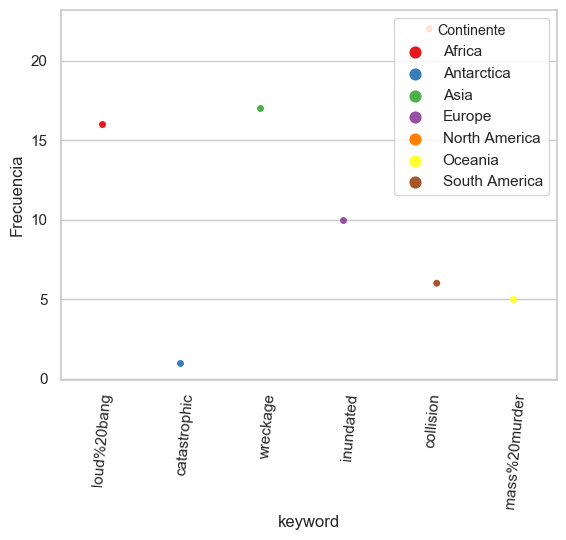

In [168]:
g=sns.stripplot(x="keyword",y="Frecuencia",data=df_continentFecuencyKeyword.reset_index(),jitter=True,hue='Continente',palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=85)

Text(0, 0.5, 'Frecuencia de la palabra clave')

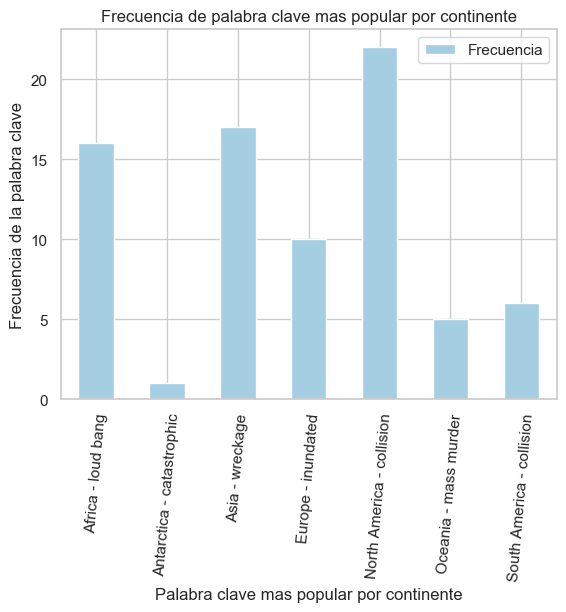

In [169]:
df_continentFecuencyKeyword=df_continentFecuencyKeyword.reset_index()
df_continentFecuencyKeyword['keyword']=df_continentFecuencyKeyword.keyword.str.replace('%20',' ')
df_continentFecuencyKeyword['Palabra clave mas popular por continente']=df_continentFecuencyKeyword['Continente'] + ' - ' + df_continentFecuencyKeyword['keyword']
df_continentFecuencyKeyword.iloc[:,2:].set_index('Palabra clave mas popular por continente').plot(kind='bar',rot=85,colormap='Paired')
plt.title("Frecuencia de palabra clave mas popular por continente")
plt.ylabel("Frecuencia de la palabra clave")

In [170]:
df_continentFecuencyKeyword.head()

,Continente,keyword,Frecuencia,Palabra clave mas popular por continente
0,Africa,loud bang,16,Africa - loud bang
1,Antarctica,catastrophic,1,Antarctica - catastrophic
2,Asia,wreckage,17,Asia - wreckage
3,Europe,inundated,10,Europe - inundated
4,North America,collision,22,North America - collision


# 49. Por locación cuantas keywords distintas hay


,Continente,keyword
0,Africa,106
1,Antarctica,2
2,Asia,152
3,Europe,171
4,North America,219
5,Oceania,88
6,South America,103


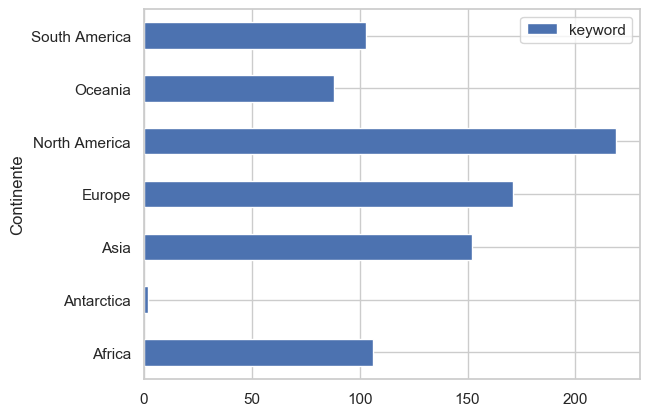

In [185]:
df_distinctWordByContinent=df_continentFecuency_aux.groupby('Continente')['keyword'].count().reset_index().iloc[:-1,:]
df_distinctWordByContinent.set_index('Continente').plot.barh()


In [186]:
df_distinctWordByContinent

,Continente,keyword
0,Africa,106
1,Antarctica,2
2,Asia,152
3,Europe,171
4,North America,219
5,Oceania,88
6,South America,103


In [202]:
import plotly.express as px

fig = px.bar(df_distinctWordByContinent, x='Continente', y='keyword',
             hover_data=['keyword'], color='keyword',
             labels={'Continente':'Continentes','keyword':'Cantidad de Palabras'}, height=400)
fig.update_layout(
    title={
        'text': "Cantidad de palabras claves distintas por continente",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# 55. Top paises menos populares

In [44]:
groupedCountries=M_df.groupby('countries')['cities'].count().sort_values(ascending=True)
groupedCountries=groupedCountries[groupedCountries>1][:15].reset_index()
groupedCountries.columns=['Paises','Frecuencia']
groupedCountries=groupedCountries.set_index('Paises')
groupedCountries

,Frecuencia
Paises,
Maldives,2
Kuwait,2
Vietnam,2
Mongolia,2
Iraq,2
Bangladesh,2
Hungary,2
Honduras,2
Central African Republic,2


Text(0, 0.5, 'Paises')

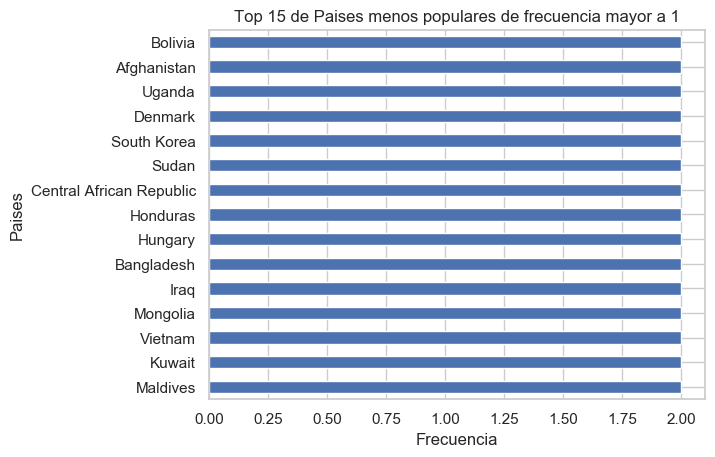

In [47]:
#sns.barplot(data = groupedCountries,x = 'Paises',y = 'Frecuencia')
groupedCountries.plot.barh(legend=None)
plt.title('Top 15 de Paises menos populares de frecuencia mayor a 1')
plt.xlabel('Frecuencia')
plt.ylabel('Paises')
